## Installing Required Libraries

In [2]:
!pip install numpy pandas scikit-learn xgboost lightgbm tensorflow


In [3]:
!pip install tensorflow
#!pip install streamlit

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Donoo\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import streamlit as st
import pickle

## Importing training and testing data 

In [6]:
Housingtrain = "C:/Users/Donoo/Desktop/BANA advanced/Bana 4/HousingQoL.csv"
Housingtraindata=pd.read_csv(Housingtrain)

In [7]:
Housingtest = "C:/Users/Donoo/Desktop/BANA advanced/Bana 4/HousingQoLtest.csv"
Housingtestdata=pd.read_csv(Housingtest)

In [8]:
df = Housingtraindata
df_test = Housingtestdata

# Data Wrangling


In [9]:
def correction(df):
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
    df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt <= 2010, df.YearBuilt)
    df = df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "Threeseasonporch",
    })
    return df

In [10]:
correction(df)
correction(df_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QoL
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0.521277
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0.510638
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0.595745
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0.595745
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0.553191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0.425532
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0.500000
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0.574468
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0.468085


In [11]:
df.drop(columns=['Id'], inplace=True)
df_test.drop(columns=['Id'], inplace=True)

## Identifying Categorical data

In [12]:
categorical_columns = ['MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig', 'LandSlope',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
                        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
                        'PoolQC', 'FireplaceQu', 'Fence', 'MiscFeature', 'Alley','TotRmsAbvGrd']

for column in categorical_columns:
    df[column] = df[column].astype('category')
    df_test[column] = df_test[column].astype('category')

## Identifying numerical data

In [13]:
numeric_columns = [col for col in df.columns if col not in categorical_columns + ['SalePrice']]
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column])
    df_test[column] = pd.to_numeric(df[column])

## Cleaning Data by replacing missing values

In [14]:
def find_missing_values(df):
    total_rows_with_missing_values = df.isnull().any(axis=1).sum()
    missing_values_per_column = df.isnull().sum()

    if total_rows_with_missing_values == 0:
        print("No missing values.")
    else:
        print(f"The Training dataset has {total_rows_with_missing_values} rows with missing values.")
        print("Missing values by column in Training Dataset:")
        for feature, num_missing_values in missing_values_per_column.items():
            if num_missing_values != 0:
                print(f"{feature}: {num_missing_values}")

In [15]:
find_missing_values(df)

The Training dataset has 1460 rows with missing values.
Missing values by column in Training Dataset:
LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [16]:
# LotFrontage
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

# Alley
df['Alley'].cat.add_categories('na', inplace=True)
df['Alley'].fillna('na', inplace=True)

# MasVnrType
df['MasVnrType'].cat.add_categories('na', inplace=True)
df['MasVnrType'].fillna('na', inplace=True)

# MasVnrArea
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

# BsmtQual
df['BsmtQual'].cat.add_categories('na', inplace=True)
df['BsmtQual'].fillna('na', inplace=True)

# BsmtCond
df['BsmtCond'].cat.add_categories('na', inplace=True)
df['BsmtCond'].fillna('na', inplace=True)

# BsmtExposure
df['BsmtExposure'].cat.add_categories('na', inplace=True)
df['BsmtExposure'].fillna('na', inplace=True)

# BsmtFinType1
df['BsmtFinType1'].cat.add_categories('na', inplace=True)
df['BsmtFinType1'].fillna('na', inplace=True)

# BsmtFinType2
df['BsmtFinType2'].cat.add_categories('na', inplace=True)
df['BsmtFinType2'].fillna('na', inplace=True)

# Electrical
df['Electrical'].cat.add_categories('na', inplace=True)
df['Electrical'].fillna('na', inplace=True)

# FireplaceQu
df['FireplaceQu'].cat.add_categories('na', inplace=True)
df['FireplaceQu'].fillna('na', inplace=True)

# GarageType
df['GarageType'].cat.add_categories('na', inplace=True)
df['GarageType'].fillna('na', inplace=True)

# GarageYrBlt
df['GarageYrBlt'].fillna(0, inplace=True)

# GarageFinish
df['GarageFinish'].cat.add_categories('na', inplace=True)
df['GarageFinish'].fillna('na', inplace=True)

# GarageQual
df['GarageQual'].cat.add_categories('na', inplace=True)
df['GarageQual'].fillna('na', inplace=True)

# GarageCond
df['GarageCond'].cat.add_categories('na', inplace=True)
df['GarageCond'].fillna('na', inplace=True)

# PoolQC
df['PoolQC'].cat.add_categories('na', inplace=True)
df['PoolQC'].fillna('na', inplace=True)

# Fence
df['Fence'].cat.add_categories('na', inplace=True)
df['Fence'].fillna('na', inplace=True)

# MiscFeature
df['MiscFeature'].cat.add_categories('na', inplace=True)
df['MiscFeature'].fillna('na', inplace=True)

In [17]:
find_missing_values(df_test)

The Training dataset has 1459 rows with missing values.
Missing values by column in Training Dataset:
MSZoning: 4
LotFrontage: 259
Alley: 1352
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 8
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinType2: 42
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageFinish: 78
GarageQual: 78
GarageCond: 78
PoolQC: 1456
Fence: 1169
MiscFeature: 1408
SaleType: 1


In [18]:
# MSSubClass
df_test.loc[df_test['MSSubClass'] == 150, 'MSSubClass'] = 160

# MSZoning
df_test['MSZoning'].fillna(df['MSZoning'].value_counts().idxmax(), inplace=True)

# LotFrontage
df_test['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

# Alley
df_test['Alley'].cat.add_categories('na', inplace=True)
df_test['Alley'].fillna('na', inplace=True)

# Utilities
df_test['Utilities'].fillna(df['Utilities'].value_counts().idxmax(), inplace=True)

# Exterior1st
df_test['Exterior1st'].fillna(df['Exterior1st'].value_counts().idxmax(), inplace=True)

# Exterior2nd
df_test['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().idxmax(), inplace=True)

# MasVnrType
df_test['MasVnrType'].cat.add_categories('na', inplace=True)
df_test['MasVnrType'].fillna('na', inplace=True)

# MasVnrArea
df_test['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

# BsmtQual
df_test['BsmtQual'].cat.add_categories('na', inplace=True)
df_test['BsmtQual'].fillna('na', inplace=True)

# BsmtCond
df_test['BsmtCond'].cat.add_categories('na', inplace=True)
df_test['BsmtCond'].fillna('na', inplace=True)

# BsmtExposure
df_test['BsmtExposure'].cat.add_categories('na', inplace=True)
df_test['BsmtExposure'].fillna('na', inplace=True)

# BsmtFinType1
df_test['BsmtFinType1'].cat.add_categories('na', inplace=True)
df_test['BsmtFinType1'].fillna('na', inplace=True)

# BsmtFinSF1
df_test['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)

# BsmtFinType2
df_test['BsmtFinType2'].cat.add_categories('na', inplace=True)
df_test['BsmtFinType2'].fillna('na', inplace=True)

# BsmtFinSF2
df_test['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median(), inplace=True)

# BsmtUnfSF
df_test['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median(), inplace=True)

# TotalBsmtSF
df_test['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)

# BsmtFullBath
df_test['BsmtFullBath'].fillna(df['BsmtFullBath'].value_counts().idxmax(), inplace=True)

# BsmtHalfBath
df_test['BsmtHalfBath'].fillna(df['BsmtHalfBath'].value_counts().idxmax(), inplace=True)

# FullBath
df_test.loc[df_test['FullBath'] == 4, 'FullBath'] = 3

# KitchenQual
df_test['KitchenQual'].fillna(df['KitchenQual'].value_counts().idxmax(), inplace=True)

# TotRmsAbvGrd
df_test['TotRmsAbvGrd'].cat.add_categories(14, inplace=True)
df_test.loc[df_test['TotRmsAbvGrd'].isin([13, 15]), 'TotRmsAbvGrd'] = 14

# Functional
df_test['Functional'].fillna(df['Functional'].value_counts().idxmax(), inplace=True)

# Fireplaces
df_test.loc[df_test['Fireplaces'] == 4, 'Fireplaces'] = 3

# FireplaceQu
df_test['FireplaceQu'].cat.add_categories('na', inplace=True)
df_test['FireplaceQu'].fillna('na', inplace=True)

# GarageType
df_test['GarageType'].cat.add_categories('na', inplace=True)
df_test['GarageType'].fillna('na', inplace=True)

# GarageYrBlt
df_test['GarageYrBlt'].fillna(0, inplace=True)

# GarageFinish
df_test['GarageFinish'].cat.add_categories('na', inplace=True)
df_test['GarageFinish'].fillna('na', inplace=True)

# GarageCars
df_test['GarageCars'].fillna(0, inplace=True)
df_test.loc[df_test['GarageCars'] == 5, 'GarageCars'] = 4

# GarageArea
df_test['GarageArea'].fillna(0, inplace=True)

# GarageQual
df_test['GarageQual'].cat.add_categories('na', inplace=True)
df_test['GarageQual'].fillna('na', inplace=True)

# GarageCond
df_test['GarageCond'].cat.add_categories('na', inplace=True)
df_test['GarageCond'].fillna('na', inplace=True)

# PoolQC
df_test['PoolQC'].cat.add_categories('na', inplace=True)
df_test['PoolQC'].fillna('na', inplace=True)

# Fence
df_test['Fence'].cat.add_categories('na', inplace=True)
df_test['Fence'].fillna('na', inplace=True)

# MiscFeature
df_test['MiscFeature'].cat.add_categories('na', inplace=True)
df_test['MiscFeature'].fillna('na', inplace=True)

# SaleType
df_test['SaleType'].fillna(df['SaleType'].value_counts().idxmax(), inplace=True)

In [19]:
find_missing_values(df)

No missing values.


In [20]:
find_missing_values(df_test)

No missing values.


In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

n = len(categorical_columns)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 6))
fig.tight_layout(pad=5.0) loop

for idx, column in enumerate(categorical_columns):
    row = idx // ncols
    col = idx % ncols

    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_title(f'Frequency Distribution of {column}')

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 6))
fig.tight_layout(pad=5.0)

target_column = df["SalePrice"]

for idx, column in enumerate(categorical_columns):
    row = idx // ncols
    col = idx % ncols

    sns.boxplot(x=column, y=target_column, data=df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)

plt.show()

# Evaluating the best model according to the test and train data 

In [23]:
def preprocess_data(df, categorical_columns, numeric_columns, is_test=False, encoder=None, scaler=None):
    # Encode categorical features
    if not is_test:
        encoder = LabelEncoder()
    for column in categorical_columns:
        df[column] = encoder.fit_transform(df[column].astype(str))

    # Scale numeric features
    if not is_test:
        scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df, encoder, scaler

In [24]:
def split_and_preprocess(df, categorical_columns, numeric_columns):
    X = df.drop(columns=["SalePrice"])
    y = df["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    X_train, encoder, scaler = preprocess_data(X_train, categorical_columns, numeric_columns)
    X_test, _, _ = preprocess_data(X_test, categorical_columns, numeric_columns, is_test=True, encoder=encoder, scaler=scaler)

    return X_train, X_test, y_train, y_test, encoder, scaler

In [25]:
X_train, X_test, y_train, y_test, encoder, scaler = split_and_preprocess(df, categorical_columns, numeric_columns)

## Initialize the models

In [26]:
# Initialize the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("ElasticNet Regression", ElasticNet()),
    ("Random Forest Regression", RandomForestRegressor()),
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("XGBoost Regression", XGBRegressor()),
    ("LightGBM Regression", LGBMRegressor())
]

In [27]:
def model_evaluation(models, X_train, X_test, y_train, y_test):

    results = {}
    
    # Train and evaluate the models
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}:")
        print(f"MSE = {mse}")
        print(f"MAE = {mae}")
        print(f"R^2 Score = {r2}")
        print("-----------------------")
        results[name] = {"MSE": mse, "MAE": mae, "R^2": r2}

    # Neural Network
    nn = Sequential()
    nn.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
    nn.add(Dense(64, activation="relu"))
    nn.add(Dense(32, activation="relu"))
    nn.add(Dense(1))

    nn.compile(optimizer="adam", loss="mean_squared_error")
    nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    y_pred = nn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Neural Network:")
    print(f"MSE = {mse}")
    print(f"MAE = {mae}")
    print(f"R^2 Score = {r2}")
    print("-----------------------")
    results["Neural Network"] = {"MSE": mse, "MAE": mae, "R^2": r2}

    return results

In [28]:
results = model_evaluation(models, X_train, X_test, y_train, y_test)

Linear Regression:
MSE = 4.432319013028265e+30
MAE = 1607325339773602.5
R^2 Score = -7.550173963758211e+20
-----------------------
Ridge Regression:
MSE = 1022466775.8417668
MAE = 19987.80159573157
R^2 Score = 0.8258292779225302
-----------------------
Lasso Regression:
MSE = 1005072813.491899
MAE = 20053.46489830075
R^2 Score = 0.8287922289482696
-----------------------
ElasticNet Regression:
MSE = 1050444725.5991585
MAE = 18768.902374007026
R^2 Score = 0.8210634118556546
-----------------------
Random Forest Regression:
MSE = 663825805.3029491
MAE = 16632.04578767123
R^2 Score = 0.886921489700155
-----------------------
Gradient Boosting Regression:
MSE = 662904960.7824544
MAE = 16730.23558829779
R^2 Score = 0.8870783497163874
-----------------------
XGBoost Regression:
MSE = 1098558612.991409
MAE = 19221.99812714041
R^2 Score = 0.8128675166861872
-----------------------
LightGBM Regression:
MSE = 900323890.3957559
MAE = 18346.24263832211
R^2 Score = 0.8466355427884408
--------------

NameError: name 'Sequential' is not defined

## Feature engineering

In [29]:
def add_features(df):
  df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
  df["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")

  return df

In [30]:
df_plus = add_features(df)

In [31]:
X_train, X_test, y_train, y_test, encoder, scaler = split_and_preprocess(df_plus, categorical_columns, numeric_columns)

In [32]:
results_after_new_features = model_evaluation(models, X_train, X_test, y_train, y_test)

Linear Regression:
MSE = 64366714832.394936
MAE = 252285.225038144
R^2 Score = -10.521756651643882
-----------------------
Ridge Regression:
MSE = 46478911232.84663
MAE = 213916.79067292414
R^2 Score = -7.319807932603958
-----------------------
Lasso Regression:
MSE = 63956864722.85892
MAE = 251467.19118092593
R^2 Score = -10.448392751714863
-----------------------
ElasticNet Regression:
MSE = 813900040.2713686
MAE = 20776.35804239756
R^2 Score = 0.8543104424827619
-----------------------
Random Forest Regression:
MSE = 711901620.6546863
MAE = 17647.599452054794
R^2 Score = 0.872568341347661
-----------------------
Gradient Boosting Regression:
MSE = 612036646.20202
MAE = 16522.071184530665
R^2 Score = 0.8904443497265625
-----------------------
XGBoost Regression:
MSE = 1002862312.3949555
MAE = 19185.435413099316
R^2 Score = 0.8204858590560816
-----------------------
LightGBM Regression:
MSE = 597412367.8489461
MAE = 16323.843115037562
R^2 Score = 0.893062121611127
--------------------

NameError: name 'Sequential' is not defined

## Choosing Gradient Boost regression

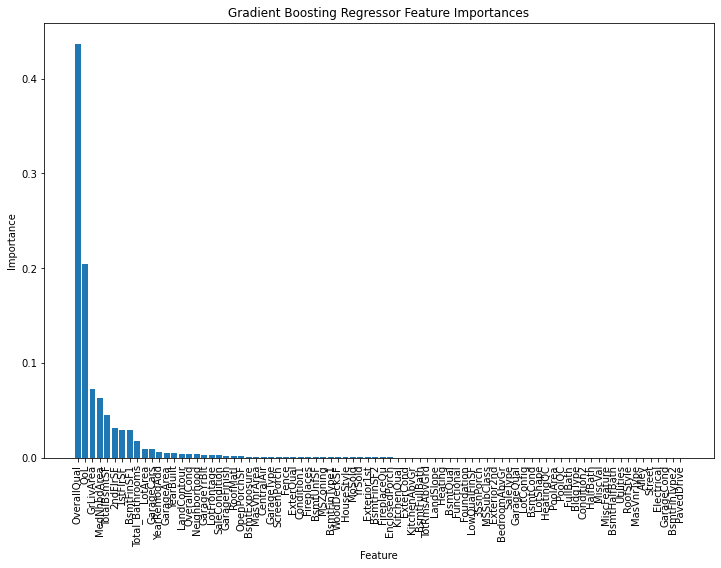

In [33]:
# initialize the model
gbr = GradientBoostingRegressor()

# fit the model
gbr.fit(X_train, y_train)

# get feature importances
feature_importances = gbr.feature_importances_

# create a list of feature names
feature_names = list(X_train.columns)

# sort the features by importance, in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boosting Regressor Feature Importances')
plt.show()

## Identifying important features

In [34]:
df_feature_importances = pd.DataFrame({'feature': sorted_feature_names, 'importance': sorted_feature_importances})
print(df_feature_importances)
df_feature_importances.to_csv('feature_importances.csv', index=False)

         feature  importance
0    OverallQual    0.437149
1            QoL    0.204936
2      GrLivArea    0.072783
3    MedNhbdArea    0.062572
4    TotalBsmtSF    0.044655
..           ...         ...
77        Street    0.000000
78    Electrical    0.000000
79    GarageCond    0.000000
80  BsmtFinType2    0.000000
81    PavedDrive    0.000000

[82 rows x 2 columns]


In [35]:
# from the observations taking the importance_threshold as 0.005
importance_threshold = 0.005  

# get feature importances
feature_importances = gbr.feature_importances_

# create a list of feature names
feature_names = list(X_train.columns)

# create a dictionary of feature importances with feature names as keys
importance_dict = dict(zip(feature_names, feature_importances))

# filter the dictionary based on the threshold
important_features = {k:v for k,v in importance_dict.items() if v >= importance_threshold}

# sort the features by importance, in descending order
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)

# print the features and their importances
for feature in sorted_features:
    print(f'{feature[0]:<20}: {feature[1]:.6f}')

OverallQual         : 0.437149
QoL                 : 0.204936
GrLivArea           : 0.072783
MedNhbdArea         : 0.062572
TotalBsmtSF         : 0.044655
2ndFlrSF            : 0.031509
1stFlrSF            : 0.029580
BsmtFinSF1          : 0.028947
Total_Bathrooms     : 0.017521
LotArea             : 0.009482
GarageCars          : 0.008785
YearRemodAdd        : 0.006407


In [36]:
imp_features = ['OverallQual','QoL' ,'GrLivArea', 'MedNhbdArea', 'TotalBsmtSF', 'GarageCars', 'Total_Bathrooms', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtQual', 'LotArea', 'YearRemodAdd', 'GarageFinish', 'GarageArea', 'YearBuilt', 'OverallCond']

IndexError: index 4 is out of bounds for axis 0 with size 4

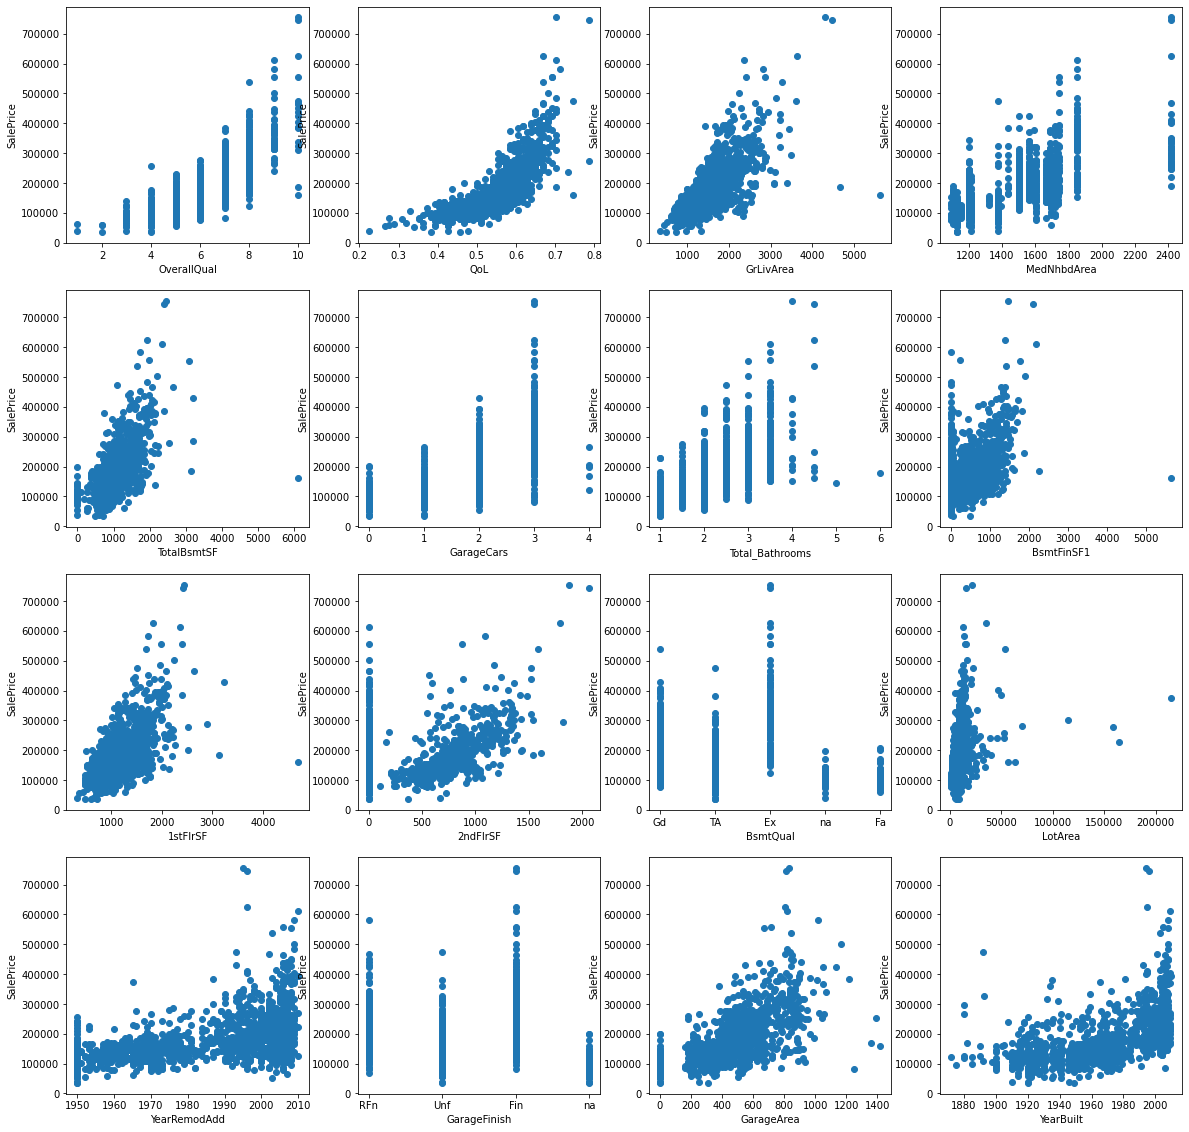

In [37]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, feature in enumerate(imp_features):
    row = i // 4
    col = i % 4
    ax[row][col].scatter(df_plus[feature], df_plus['SalePrice'])
    ax[row][col].set_xlabel(feature)
    ax[row][col].set_ylabel('SalePrice')

plt.show()

## Correllation between the important features

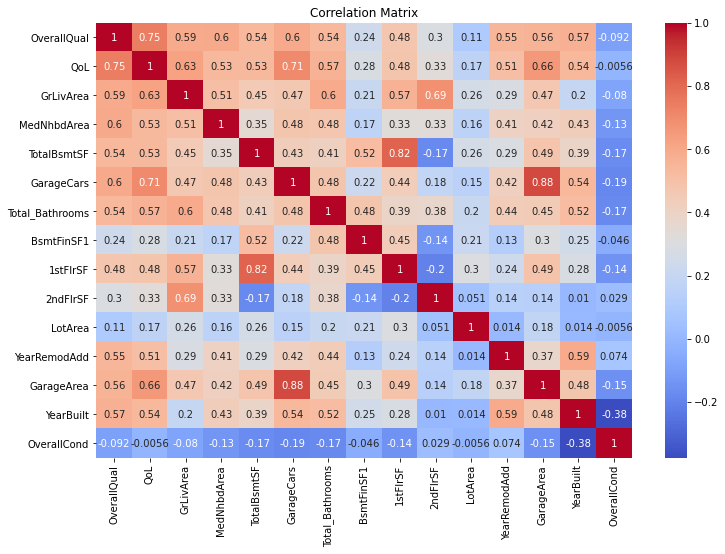

In [38]:
# Select only important features
df_imp = df_plus[imp_features]
df_imp_reg =  df_plus[imp_features]

# Compute correlation matrix
corr_matrix = df_imp.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [102]:
df_imp

,OverallQual,QoL,GrLivArea,MedNhbdArea,TotalBsmtSF,GarageCars,Total_Bathrooms,BsmtFinSF1,1stFlrSF,2ndFlrSF,BsmtQual,LotArea,YearRemodAdd,GarageFinish,GarageArea,YearBuilt,OverallCond
0,7,0.585106,1710,1500.0,856,2,3.5,706,856,854,Gd,8450,2003,RFn,548,2003,5
1,6,0.574468,1262,1437.0,1262,2,2.5,978,1262,0,Gd,9600,1976,RFn,460,1976,8
2,7,0.595745,1786,1500.0,920,2,3.5,486,920,866,Gd,11250,2002,RFn,608,2001,5
3,7,0.606383,1717,1717.0,756,3,2.0,216,961,756,TA,9550,1970,Unf,642,1915,5
4,8,0.638298,2198,2418.0,1145,3,3.5,655,1145,1053,Gd,14260,2000,RFn,836,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,0.585106,1647,1593.0,953,2,2.5,0,953,694,Gd,7917,2000,RFn,460,1999,5
1456,6,0.585106,2073,1664.0,1542,2,3.0,790,2073,0,Gd,13175,1988,Unf,500,1978,6
1457,7,0.691489,2340,1717.0,1152,1,2.0,275,1188,1152,TA,9042,2006,RFn,252,1941,9
1458,5,0.500000,1078,1200.0,1078,1,2.0,49,1078,0,TA,9717,1996,Unf,240,1950,6


In [39]:
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

In [40]:
results_with_imp_features = model_evaluation(models, X_train_imp, X_test_imp, y_train, y_test)

Linear Regression:
MSE = 964738965.1170393
MAE = 22391.076256576598
R^2 Score = 0.8273100061517664
-----------------------
Ridge Regression:
MSE = 964481533.1872475
MAE = 22386.93127568538
R^2 Score = 0.8273560869259236
-----------------------
Lasso Regression:
MSE = 964531641.6556449
MAE = 22388.953379220107
R^2 Score = 0.8273471174207909
-----------------------
ElasticNet Regression:
MSE = 1070285005.9539298
MAE = 23256.42149199295
R^2 Score = 0.8084170767668558
-----------------------
Random Forest Regression:
MSE = 719905993.3984579
MAE = 17446.77186073059
R^2 Score = 0.8711355443633357
-----------------------
Gradient Boosting Regression:
MSE = 661962291.4213378
MAE = 17541.718381655308
R^2 Score = 0.8815075702685595
-----------------------
XGBoost Regression:
MSE = 949364430.1764251
MAE = 19484.299055543663
R^2 Score = 0.8300620753024015
-----------------------
LightGBM Regression:
MSE = 623597403.9510901
MAE = 16588.973284742697
R^2 Score = 0.8883749534890781
-------------------

NameError: name 'Sequential' is not defined

## Hyper parameter tuning

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for the Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

# Train and evaluate the model with the best parameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train, y_train)

mse = mean_squared_error(y_test, best_gbr.predict(X_test))
mae = mean_absolute_error(y_test, best_gbr.predict(X_test))
r2 = r2_score(y_test, best_gbr.predict(X_test))

print("\nAfter Hyperparameter Tuning:")
print("MSE =", mse)
print("MAE =", mae)
print("R^2 Score =", r2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.3min finished


Best parameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}

After Hyperparameter Tuning:
MSE = 629588110.9577411
MAE = 16185.190281394487
R^2 Score = 0.8873026062598982


## Sale price pridction

In [45]:
best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [50]:
params= best_params
params

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [46]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [48]:
# Preprocess the test dataset
df_test = add_features(df_test)
df_test, _, _ = preprocess_data(df_test, categorical_columns, numeric_columns, is_test=True, encoder=encoder, scaler=scaler)

In [49]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QoL,Total_Bathrooms,MedNhbdArea
0,0.072771,2,-0.220644,-0.207111,1,2,3,3,0,4,...,2,3,-0.087718,-1.598653,0.138826,8,4,0.413042,2.391454,-0.035478
1,-0.873090,3,0.460330,-0.091895,1,2,0,3,0,0,...,4,0,-0.087718,-0.489027,-0.614137,8,4,0.253701,1.563012,-0.035478
2,0.072771,3,-0.084449,0.073415,1,2,0,3,0,4,...,2,3,-0.087718,0.990475,0.138826,8,4,0.572384,2.391454,0.024472
3,0.309236,3,-0.447635,-0.096904,1,2,0,3,0,4,...,4,3,-0.087718,-1.598653,-1.367100,8,4,0.731725,-0.419137,0.024472
4,0.072771,3,0.641924,0.374980,1,2,0,1,0,4,...,4,3,-0.087718,2.100101,0.138826,8,4,1.209749,2.391454,0.000682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.873090,4,-0.356839,-0.302289,1,2,3,3,0,4,...,4,3,-0.087718,1.360351,0.891789,8,4,0.094360,1.396678,-0.580739
1455,0.072771,4,-0.356839,-0.260511,1,2,3,3,0,4,...,4,3,-0.087718,0.620600,-0.614137,8,0,0.413042,0.463529,-0.580739
1456,-0.873090,3,0.687322,0.266277,1,2,3,3,0,4,...,4,3,-0.087718,-1.598653,1.644752,8,0,0.413042,1.396678,-0.018350
1457,0.309236,3,-0.175245,-0.147800,1,2,3,3,0,4,...,2,2,4.951368,-0.489027,1.644752,8,4,2.006456,-0.531247,-0.018350


In [63]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QoL,SalePrice,Total_Bathrooms,MedNhbdArea
0,0.073375,3,-0.220875,-0.207142,1,2,3,3,0,4,...,4,-0.087688,-1.599111,0.138777,8,4,0.413514,208500,3.5,1500.0
1,-0.872563,3,0.460320,-0.091886,1,2,3,3,0,2,...,4,-0.087688,-0.489110,-0.614439,8,4,0.254134,181500,2.5,1437.0
2,0.073375,3,-0.084636,0.073480,1,2,0,3,0,4,...,4,-0.087688,0.990891,0.138777,8,4,0.572894,223500,3.5,1500.0
3,0.309859,3,-0.447940,-0.096897,1,2,0,3,0,0,...,4,-0.087688,-1.599111,-1.367655,8,0,0.732274,140000,2.0,1717.0
4,0.073375,3,0.641972,0.375148,1,2,0,3,0,2,...,4,-0.087688,2.100892,0.138777,8,4,1.210413,250000,3.5,2418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.357114,-0.260560,1,2,3,3,0,4,...,4,-0.087688,0.620891,-0.614439,8,4,0.413514,175000,2.5,1593.0
1456,-0.872563,3,0.687385,0.266407,1,2,3,3,0,4,...,4,-0.087688,-1.599111,1.645210,8,4,0.413514,210000,3.0,1664.0
1457,0.309859,3,-0.175462,-0.147810,1,2,3,3,0,4,...,2,4.953112,-0.489110,1.645210,8,4,2.007312,266500,2.0,1717.0
1458,-0.872563,3,-0.084636,-0.080160,1,2,3,3,0,4,...,4,-0.087688,-0.859110,1.645210,8,4,-0.861524,142125,2.0,1200.0


In [60]:
df = add_features(df)


In [62]:
df, _, _ = preprocess_data(df, categorical_columns, numeric_columns, is_test=True, encoder=encoder, scaler=scaler)

In [64]:
X = df.drop('SalePrice', axis=1) 
y= df.SalePrice


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)


In [66]:
params

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [68]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 723862768.5007


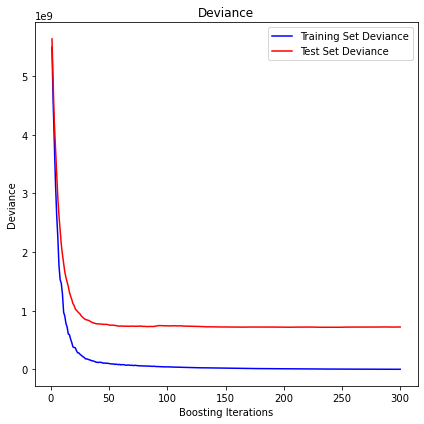

In [69]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(reg.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## SHAP analysis

In [72]:
!pip install lime
import lime
import lime.lime_tabular
import warnings

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283850 sha256=dc101fad3cd96ae27f3348b8f19615e16c08f82758deb37249ee07cb13395656
  Stored in directory: c:\users\donoo\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [73]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QoL,Total_Bathrooms,MedNhbdArea
557,-0.163109,0,-0.447940,0.052433,1,2,3,2,0,4,...,4,4,-0.087688,0.990891,-1.367655,0,4,-0.542765,1.5,1128.0
894,0.782828,3,-0.266288,-0.350660,1,2,3,0,0,4,...,4,4,-0.087688,-0.119110,0.891994,8,2,-1.339664,2.0,1603.0
489,2.911188,4,-2.219047,-0.901079,1,2,3,3,0,4,...,4,4,-0.087688,-0.489110,0.891994,8,4,-0.861524,2.0,1092.0
1242,0.664586,3,0.687385,0.010841,1,2,3,3,0,4,...,2,4,-0.087688,-1.969111,1.645210,8,3,0.572894,3.0,1664.0
1045,-0.872563,3,-0.039223,0.317020,1,2,0,3,0,1,...,4,4,-0.087688,-0.119110,0.891994,8,4,-0.861524,2.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,-0.872563,3,-0.130049,0.013948,1,2,0,1,0,4,...,4,4,-0.087688,1.730892,-0.614439,6,5,0.891654,2.0,1689.5
742,-0.872563,3,-0.220875,-0.207142,1,2,3,3,0,4,...,0,4,-0.087688,2.100892,-0.614439,8,4,0.413514,2.0,1603.0
74,-0.163109,4,-0.447940,-0.473732,1,2,3,3,0,0,...,4,4,-0.087688,-0.489110,1.645210,8,4,-0.383385,2.0,1374.0
176,0.073375,3,1.232341,-0.048891,1,2,0,3,0,0,...,4,4,-0.087688,0.990891,-0.614439,8,4,0.413514,3.0,1738.0


In [74]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [75]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QoL,Total_Bathrooms,MedNhbdArea
557,-0.163109,0,-0.447940,0.052433,1,2,3,2,0,4,...,4,4,-0.087688,0.990891,-1.367655,0,4,-0.542765,1.5,1128.0
894,0.782828,3,-0.266288,-0.350660,1,2,3,0,0,4,...,4,4,-0.087688,-0.119110,0.891994,8,2,-1.339664,2.0,1603.0
489,2.911188,4,-2.219047,-0.901079,1,2,3,3,0,4,...,4,4,-0.087688,-0.489110,0.891994,8,4,-0.861524,2.0,1092.0
1242,0.664586,3,0.687385,0.010841,1,2,3,3,0,4,...,2,4,-0.087688,-1.969111,1.645210,8,3,0.572894,3.0,1664.0
1045,-0.872563,3,-0.039223,0.317020,1,2,0,3,0,1,...,4,4,-0.087688,-0.119110,0.891994,8,4,-0.861524,2.0,1200.0


<AxesSubplot:>

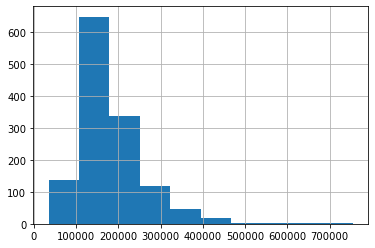

In [76]:
y_train.hist()

In [ ]:
# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(X_train, y_train)

In [84]:
!pip install SHAP

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [85]:
import shap

In [86]:
pred = reg.predict(X_train)
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_train)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

8.731149137020111e-10

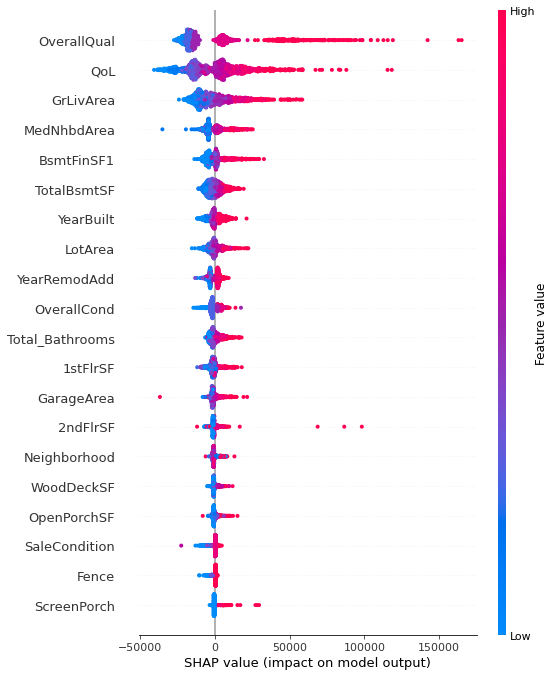

In [87]:
shap.summary_plot(shap_values, X_train)

In [88]:
X100 = shap.utils.sample(X, 100)

In [89]:
explainer = shap.Explainer(reg.predict, X100)
shap_values = explainer(X)
#shap_values = explainer(X100)

Permutation explainer: 1461it [03:33,  6.59it/s]                          


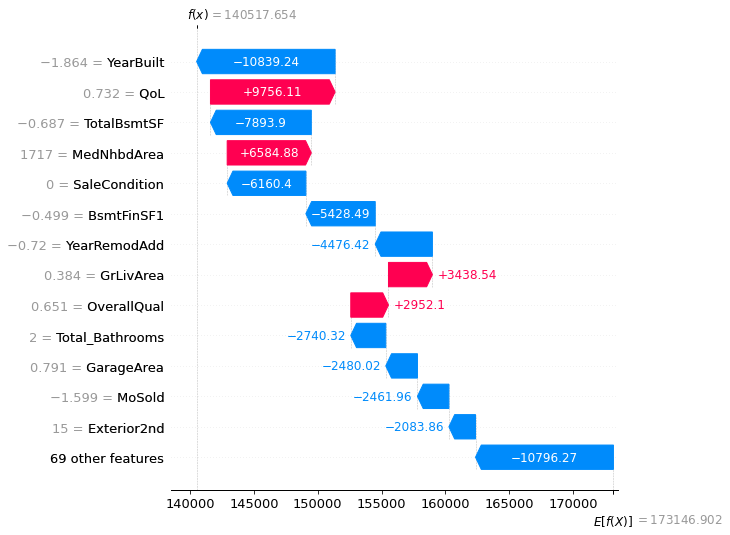

In [90]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind = 3
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

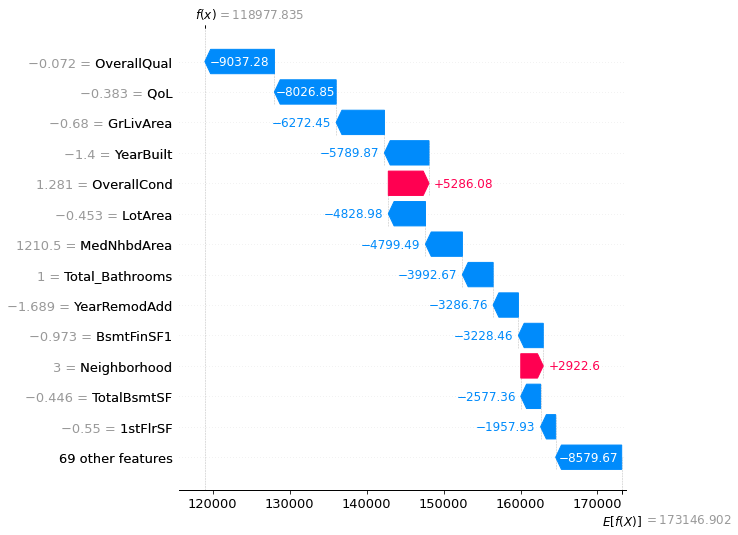

In [91]:
sample_ind = 1400
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

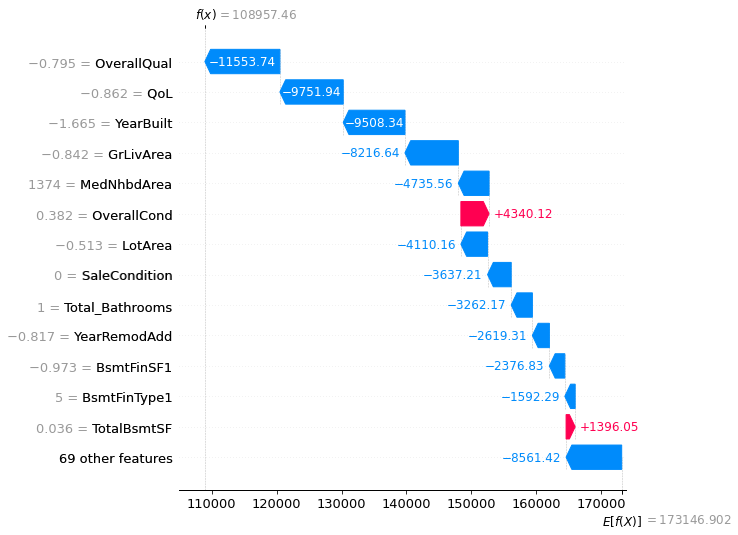

In [92]:
sample_ind = 693
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

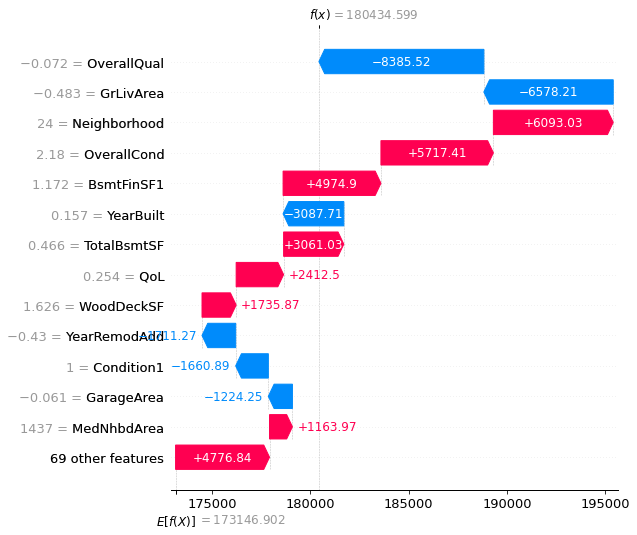

In [96]:
sample_ind = 1
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

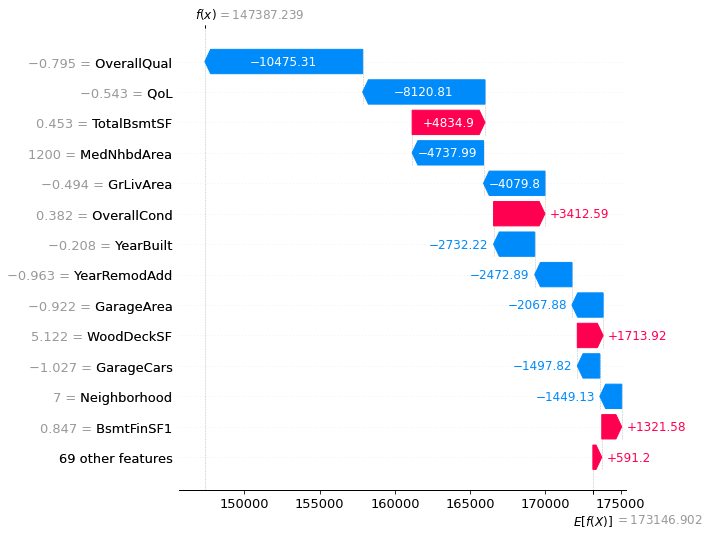

In [99]:
sample_ind = 1459
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [101]:
shap_values[1459]

.values =
array([ 2.05481485e+02,  7.70663631e+01,  2.28428315e+02, -2.40591794e+02,
        1.19925625e+01, -2.04060940e+01, -1.53706365e+02,  5.07065549e+01,
        0.00000000e+00,  1.16926041e+02, -1.32317712e+01, -1.44913431e+03,
        4.26432254e+02,  0.00000000e+00,  8.91566893e+01, -3.59958918e+02,
       -1.04753052e+04,  3.41258689e+03, -2.73221754e+03, -2.47288692e+03,
       -4.42180393e+01, -3.05113602e+01, -7.70778373e+01, -3.23518518e+02,
        3.58435298e+01, -2.58324129e+02, -9.09538894e+01, -2.79447149e+01,
        1.33825892e+00, -3.75923893e+01,  1.38372582e+02, -3.85281116e+02,
        1.40196189e+02,  1.32157818e+03, -1.29833181e+02,  1.91630726e+02,
        2.10638070e+02,  4.83489874e+03,  0.00000000e+00,  9.12459484e+01,
        4.16625296e+01, -6.16360722e+01,  7.74478285e+01, -1.06055226e+03,
        0.00000000e+00, -4.07980278e+03, -4.54425984e+01, -4.33250635e+00,
       -1.95992899e+02,  3.10308284e+02,  8.45276112e+01,  9.10814510e+01,
       -1.85721

In [81]:
feat_importances = pd.Series(reg.feature_importances_,index = reg.feature_names_in_)
feat_importances.nlargest(20).plot(kind='barh')

AttributeError: 'GradientBoostingRegressor' object has no attribute 'feature_names_in_'

In [ ]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    rfclass, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=rfclass.feature_na

In [44]:
# Preprocess the test dataset
df_test = add_features(df_test)
df_test, _, _ = preprocess_data(df_test, categorical_columns, numeric_columns, is_test=True, encoder=encoder, scaler=scaler)

# Make predictions on the test dataset
predicted_prices = best_params.predict(df_test)
df_test['PredictedSalePrice'] = predicted_prices
df_test.head(5)

AttributeError: 'dict' object has no attribute 'predict'